# Problem Statement

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Column Profiling:

1. datetime: datetime
2. season: season (1: spring, 2: summer, 3: fall, 4: winter)
3. holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
4. workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
5. weather:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp: temperature in Celsius
7. atemp: feeling temperature in Celsius
8. humidity: humidity
9. windspeed: wind speed
10. casual: count of casual users
11. registered: count of registered users
12. count: count of total rental bikes including both casual and registered

In [118]:
df = pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [119]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


yulu csv file consists of rows and column of data where number of rows = 10886, number of columns = 12
['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'] are the columns we have in which 'season', 'holiday', 'workingday', 'weather' are categorical attributes but converted in numerical in this dataset so that it would be easy to perform analysis and all other columns are numerical except 'datetime' which is categorical consists of datetime in string format

In [121]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['date'] = df['datetime'].dt.date
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.time

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,month,year,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1,2011,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,2011,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,1,2011,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,1,2011,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,1,2011,04:00:00


converted 'datetime' column from object to datetime dtype and from that made new columns consisting of date, day, month, year and time

In [122]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,9.992559,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,5.476608,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,5.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,10.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,15.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,19.000000,12.000000,2012.000000


1. for season column; mean is 2.5, std is 1.11, min is 0, 25th percentile is 2.0, 50th percentile is 3.0, 75th percentile is 4.0 and max is also 4.0 which shows that data of different season are equal in number

2. for holiday column; mean is 0.028569, std is 0.166599, min is 0, 25th percentile is 0, 50th percentile is 0, 75th percentile is 0 and max is 1.0 which shows max of the times there is no holiday(0)

3. for workingday column; mean is 0.680875, std is 0.466159, min is 0, 25th percentile is 0, 50th percentile is 1, 75th percentile is 1 and max is also 1.0 which shows max of the times there is workingday(1) also makes sense as holiday and workingday is inversely proportional

4. for weather column; mean is 1.418427, std is 0.633839, min is 1, 25th percentile is 1, 50th percentile is 1, 75th percentile is 2 and max is 4.0 which shows 50 percent of the times there is weather(1) 

5. for temp column; mean is 20.23086, std is 7.79159, min is 0.82000, 25th percentile is 13.94000, 50th percentile is 20.50000, 75th percentile is 26.24000 and max is 41.00000 which shows majority of times temperature is lower than 20 as compared to higher temperature

6. for atemp column; mean is 23.655084, std is 8.474601, min is 0.760000, 25th percentile is 16.665000, 50th percentile is 24.240000, 75th percentile is 31.060000 and max is 45.455000 

7. for humidity column; mean is 61.886460, std is 19.245033, min is 0.000000, 25th percentile is 47.000000, 50th percentile is 62.000000, 75th percentile is 77.000000 and max is 100.000000 which shows that majorily humidity remains greater than 50

8. for windspeed column; mean is 12.799395, std is 8.164537, min is 0.000000, 25th percentile is 7.001500, 50th percentile is 12.998000, 75th percentile is 16.997900 and max is 56.996900 which shows that majorily windspeed remains lower than 20

9. for casual column; mean is 36.021955, std is 49.960477, min is 0.000000, 25th percentile is 4.000000, 50th percentile is 17.000000, 75th percentile is 49.000000 and max is 367.000000 which shows that majorily casual users remains lower than 20

10. for registered column; mean is 155.552177, std is 151.039033, min is 0.000000, 25th percentile is 36.000000, 50th percentile is 118.000000, 75th percentile is 222.000000 and max is 886.000000 which shows that majorily registered users remains lower than or around 150

11. for count column; mean is 191.574132, std is 181.144454, min is 1.000000, 25th percentile is 42.000000, 50th percentile is 145.000000, 75th percentile is 284.000000 and max is 977.000000 which shows that majorily count of rental bikes remains around or lower than 150

12. for day column; mean is 9.992559, std is 5.476608, min is 1.000000, 25th percentile is 5.000000, 50th percentile is 10.000000, 75th percentile is 15.000000 and max is 19.000000 which shows that day ranges from 1 to 19 only and each day is equally likely 

13. for month column; mean is 6.521495, std is 3.444373, min is 1.000000, 25th percentile is 4.000000, 50th percentile is 7.000000, 75th percentile is 10.000000 and max is 12.000000 which shows that each month is equally likely 

14. for year column; mean is 2011.501929, std is 0.500019, min is 2011.000000, 25th percentile is 2011.000000, 50th percentile is 2012.000000, 75th percentile is 2012.000000 and max is 2012.000000 which shows our dataset contains data for 2011 and 2012 only and each year is equally likely 

In [123]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
day           0
month         0
year          0
time          0
dtype: int64

no null values in any of the column

In [124]:
for i in df.columns:
    print(i,':',df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822
date : 456
day : 19
month : 12
year : 2
time : 24


number of unique values per column, datetime column consists unique value for each row

# Univariate Visualization

In [125]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

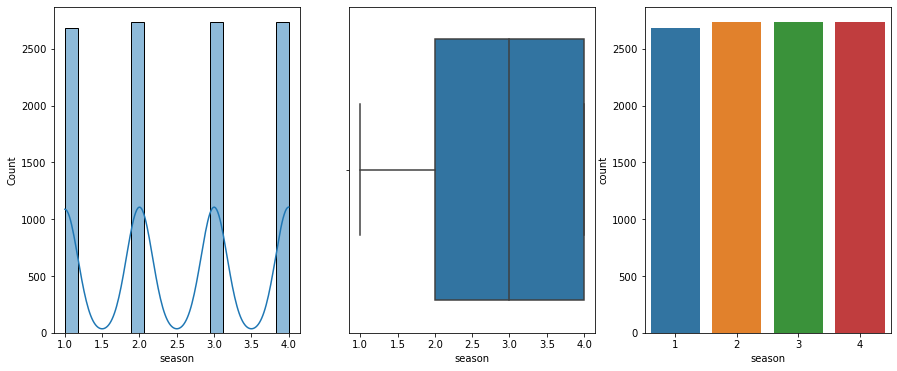

In [126]:
figure, axes = plt.subplots(1,3,figsize=(15,6))

sns.histplot(data=df,x='season',kde=True,ax=axes[0])
sns.boxplot(data=df,x='season',ax=axes[1])
sns.countplot(data=df,x='season',ax=axes[2])

plt.show()
    
    

each season is equally likely just a small difference in any of them if exists

In [127]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

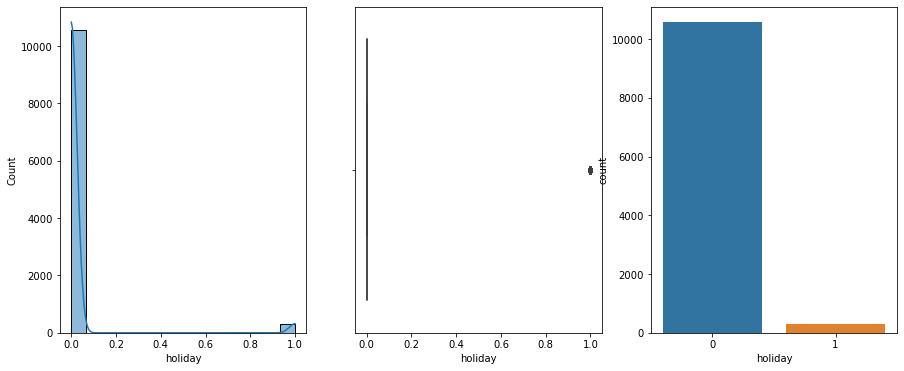

In [128]:
figure, axes = plt.subplots(1,3,figsize=(15,6))

sns.histplot(data=df,x='holiday',kde=True,ax=axes[0])
sns.boxplot(data=df,x='holiday',ax=axes[1])
sns.countplot(data=df,x='holiday',ax=axes[2])

plt.show()

number of holidays is much less than number of non holidays

In [129]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

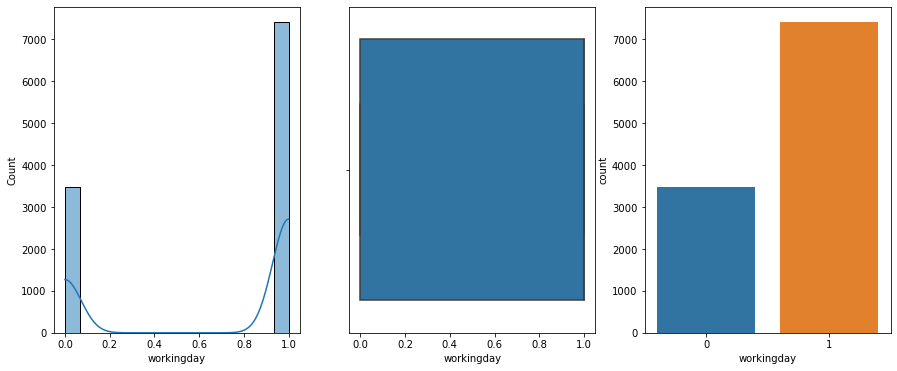

In [130]:
figure, axes = plt.subplots(1,3,figsize=(15,6))

sns.histplot(data=df,x='workingday',kde=True,ax=axes[0])
sns.boxplot(data=df,x='workingday',ax=axes[1])
sns.countplot(data=df,x='workingday',ax=axes[2])

plt.show()

number of workingdays is greater than number of non workingdays, this should be inverse of holiday but there is also an addition to non workingdays that is days of weekends(3474-311 = 3163)

In [131]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

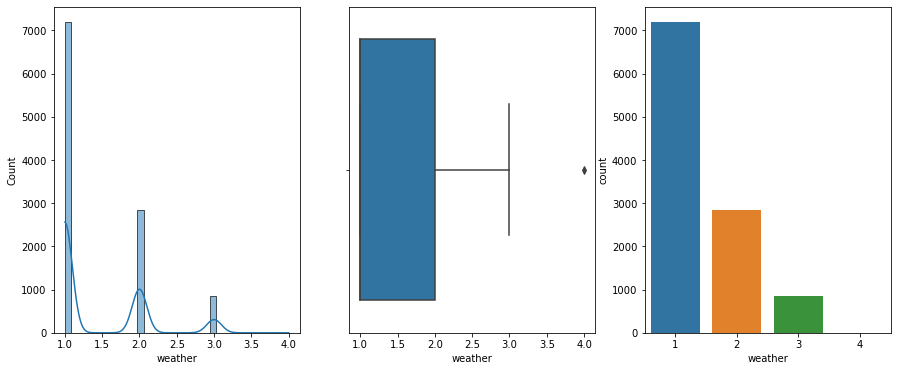

In [132]:
figure, axes = plt.subplots(1,3,figsize=(15,6))

sns.histplot(data=df,x='weather',kde=True,ax=axes[0])
sns.boxplot(data=df,x='weather',ax=axes[1])
sns.countplot(data=df,x='weather',ax=axes[2])

plt.show()

number of days of weather are in order 1>2>3>4, days of weather 4 is negligible

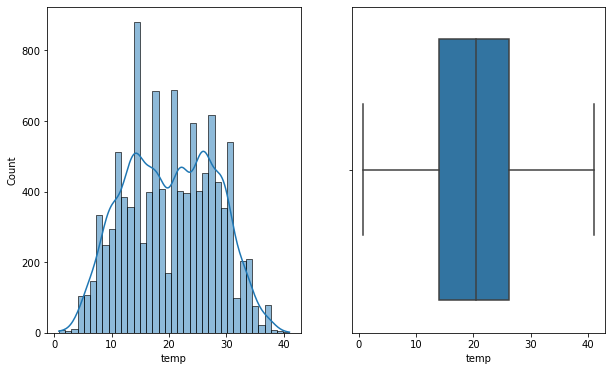

In [133]:
figure, axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(data=df,x='temp',kde=True,ax=axes[0])
sns.boxplot(data=df,x='temp',ax=axes[1])

plt.show()

mostly temperature ranges from 10 to 30

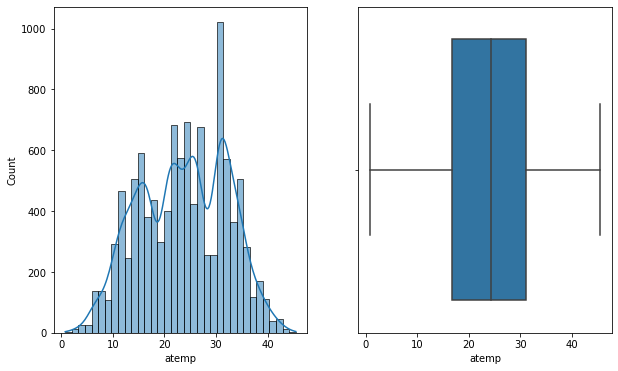

In [134]:
figure, axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(data=df,x='atemp',kde=True,ax=axes[0])
sns.boxplot(data=df,x='atemp',ax=axes[1])

plt.show()

mostly temperature feeled ranges from 10 to 35

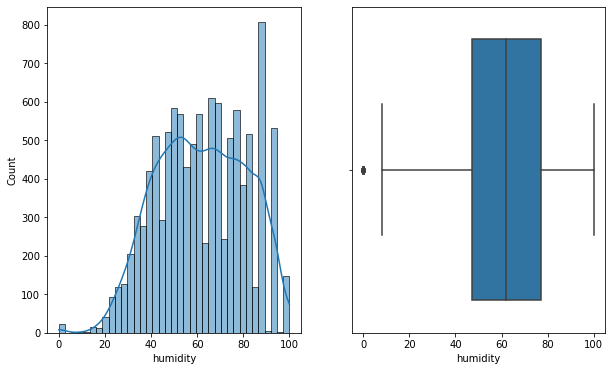

In [135]:
figure, axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(data=df,x='humidity',kde=True,ax=axes[0])
sns.boxplot(data=df,x='humidity',ax=axes[1])

plt.show()

mostly humidity greater than 10 that's why humidity smaller than 0 is an outlier, mostly humidity ranges from 20 100

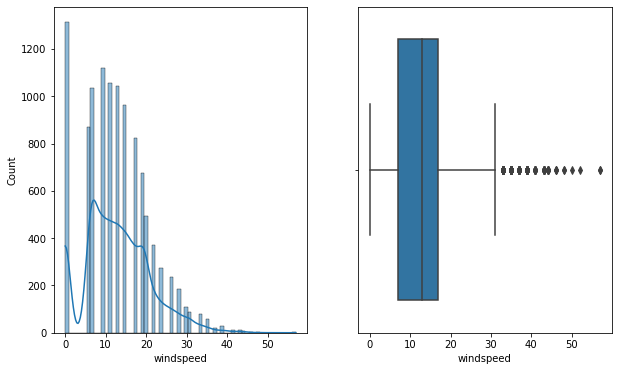

In [136]:
figure, axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(data=df,x='windspeed',kde=True,ax=axes[0])
sns.boxplot(data=df,x='windspeed',ax=axes[1])

plt.show()

for many days there is no wind but apart from that mostly windspeed ranges from 5 to 30, windspeed >30 is very rare that's why they are outliers

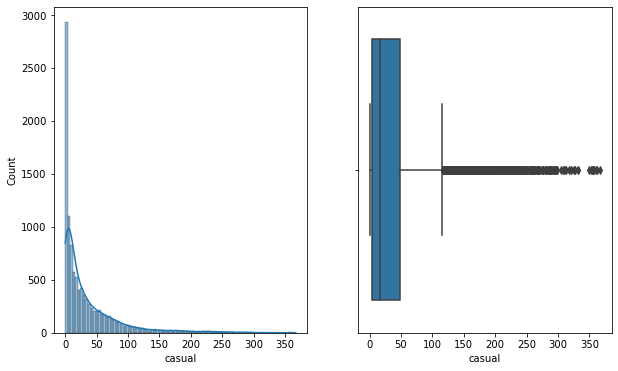

In [137]:
figure, axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(data=df,x='casual',kde=True,ax=axes[0])
axes[0].set_xticks(np.arange(0,400,50))
sns.boxplot(data=df,x='casual',ax=axes[1])
axes[1].set_xticks(np.arange(0,400,50))

plt.show()

mostly casual users are from 0 to 125, greater than that are rare that's why they are outliers

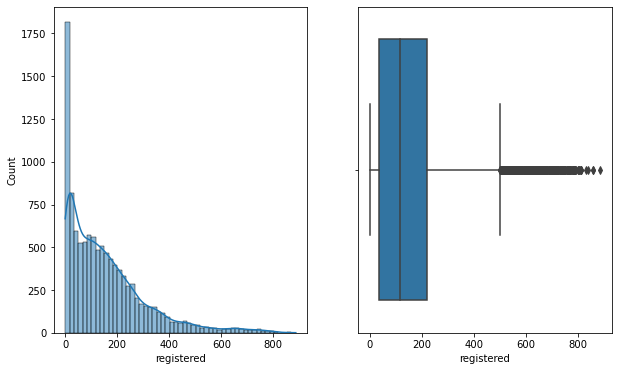

In [138]:
figure, axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(data=df,x='registered',kde=True,ax=axes[0])
sns.boxplot(data=df,x='registered',ax=axes[1])

plt.show()

mostly registered users are from 0 to 500 , greater than that are rare that's why they are outliers

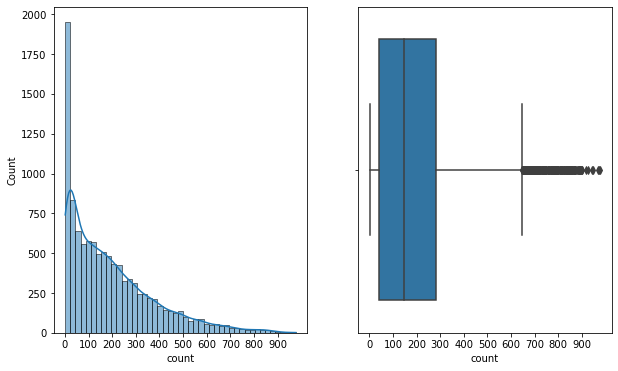

In [139]:
figure, axes = plt.subplots(1,2,figsize=(10,6))

sns.histplot(data=df,x='count',kde=True,ax=axes[0])
axes[0].set_xticks(np.arange(0,1000,100))
sns.boxplot(data=df,x='count',ax=axes[1])
axes[1].set_xticks(np.arange(0,1000,100))

plt.show()

mostly bikes rented are from 0 to 650, greater than that are rare that's why they are outliers

In [140]:
df['day'].value_counts()

1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: day, dtype: int64

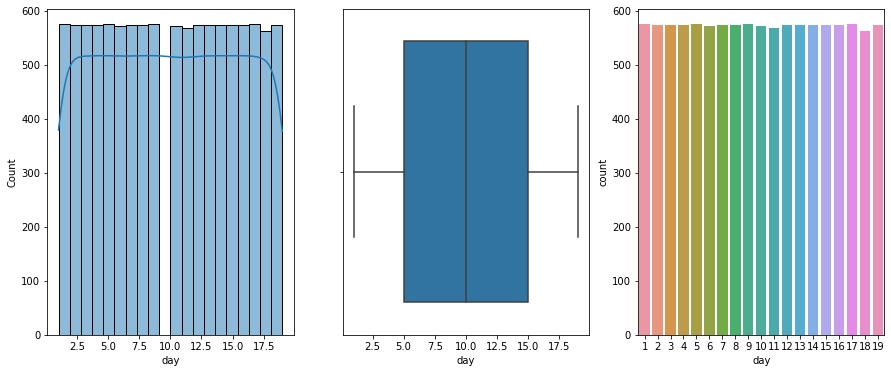

In [141]:
figure, axes = plt.subplots(1,3,figsize=(15,6))

sns.histplot(data=df,x='day',kde=True,ax=axes[0])
sns.boxplot(data=df,x='day',ax=axes[1])
sns.countplot(data=df,x='day',ax=axes[2])

plt.show()

In [142]:
df['month'].value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

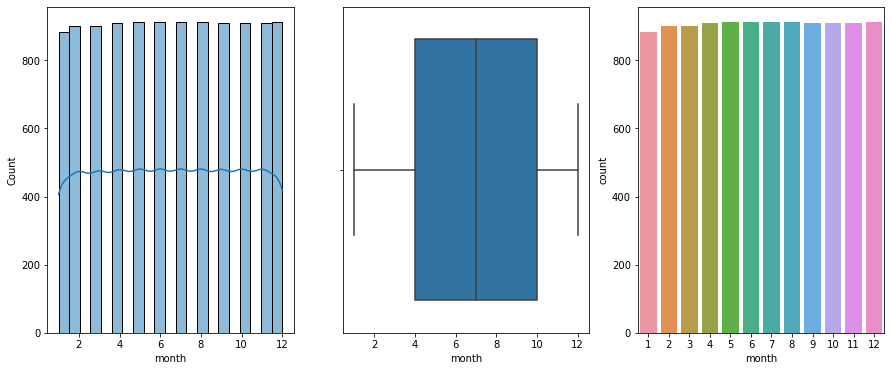

In [143]:
figure, axes = plt.subplots(1,3,figsize=(15,6))

sns.histplot(data=df,x='month',kde=True,ax=axes[0])
sns.boxplot(data=df,x='month',ax=axes[1])
sns.countplot(data=df,x='month',ax=axes[2])

plt.show()

In [144]:
df['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

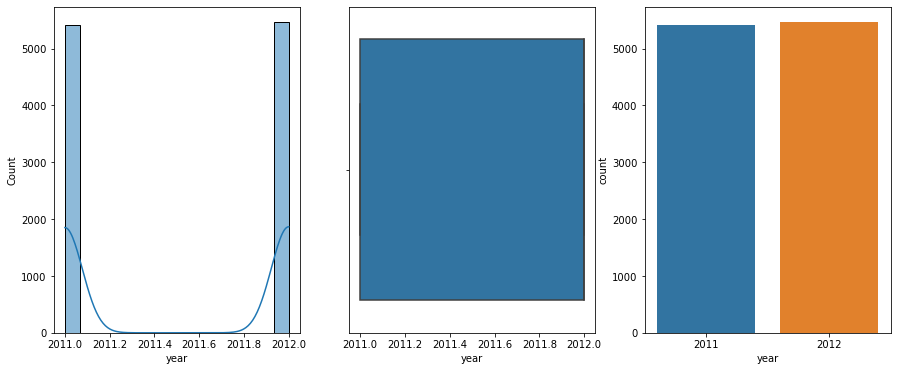

In [145]:
figure, axes = plt.subplots(1,3,figsize=(15,6))

sns.histplot(data=df,x='year',kde=True,ax=axes[0])
sns.boxplot(data=df,x='year',ax=axes[1])
sns.countplot(data=df,x='year',ax=axes[2])

plt.show()

In [146]:
df['time'].value_counts()

12:00:00    456
13:00:00    456
22:00:00    456
21:00:00    456
20:00:00    456
19:00:00    456
18:00:00    456
17:00:00    456
16:00:00    456
15:00:00    456
14:00:00    456
23:00:00    456
11:00:00    455
10:00:00    455
09:00:00    455
08:00:00    455
07:00:00    455
06:00:00    455
00:00:00    455
01:00:00    454
05:00:00    452
02:00:00    448
04:00:00    442
03:00:00    433
Name: time, dtype: int64

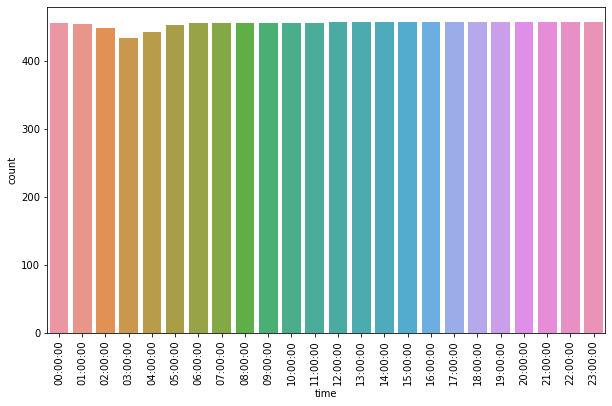

In [147]:
figure, axes = plt.subplots(1,figsize=(10,6))
sns.countplot(data=df,x='time')
plt.xticks(rotation=90)

plt.show()

# Bivariate Visualization

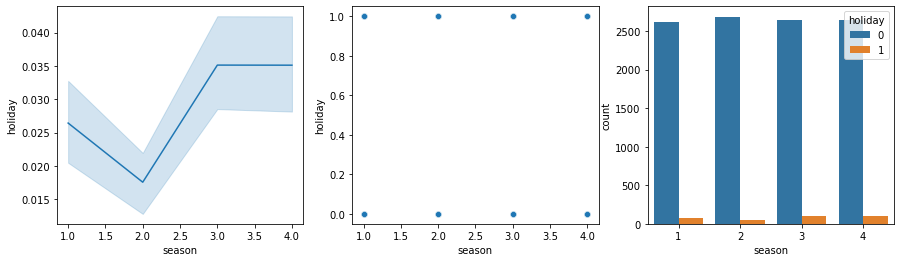

In [148]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='holiday',ax=axes[0])
sns.scatterplot(data=df,x='season',y='holiday',ax=axes[1])
sns.countplot(data=df,x='season',hue='holiday',ax=axes[2])

plt.show()

number of holidays are similar in season 3 and 4 then somewhat less in season 1 and minimum in season 2

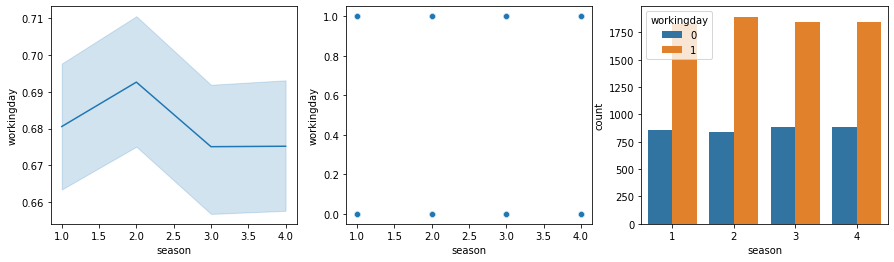

In [149]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='workingday',ax=axes[0])
sns.scatterplot(data=df,x='season',y='workingday',ax=axes[1])
sns.countplot(data=df,x='season',hue='workingday',ax=axes[2])

plt.show()

number of workingdays are similar in season 3 and 4 then somewhat more in season 1 and maximum in season 2

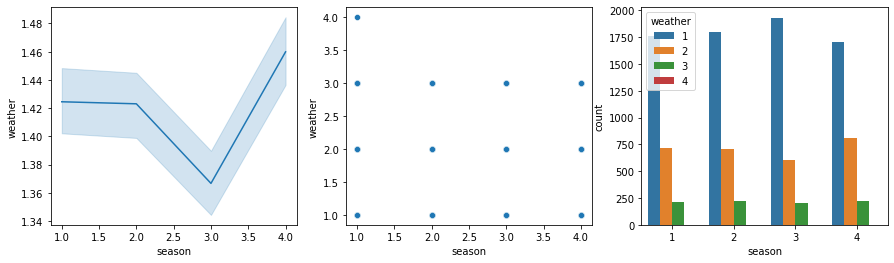

In [150]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='weather',ax=axes[0])
sns.scatterplot(data=df,x='season',y='weather',ax=axes[1])
sns.countplot(data=df,x='season',hue='weather',ax=axes[2])

plt.show()

one day of weather 4 is in season 1, weather 2 days is least in season 3, most in season 4 and similar in season 1 & 2, inverse for weather 1 and rest is similar

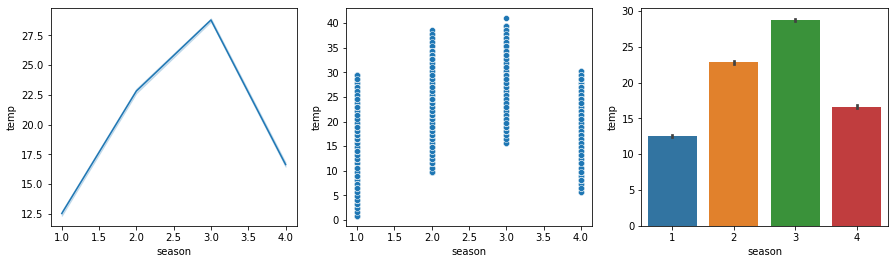

In [151]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='temp',ax=axes[0])
sns.scatterplot(data=df,x='season',y='temp',ax=axes[1])
sns.barplot(data=df, x="season", y="temp", estimator=np.mean,ax=axes[2])

plt.show()

temperature order from max to min seasonwise is 3>2>4>1

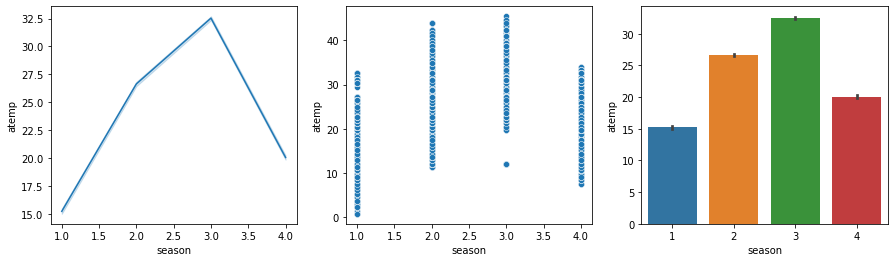

In [152]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='atemp',ax=axes[0])
sns.scatterplot(data=df,x='season',y='atemp',ax=axes[1])
sns.barplot(data=df, x="season", y="atemp", estimator=np.mean,ax=axes[2])


plt.show()

temperature feeled or experienced order from max to min seasonwise is 3>2>4>1

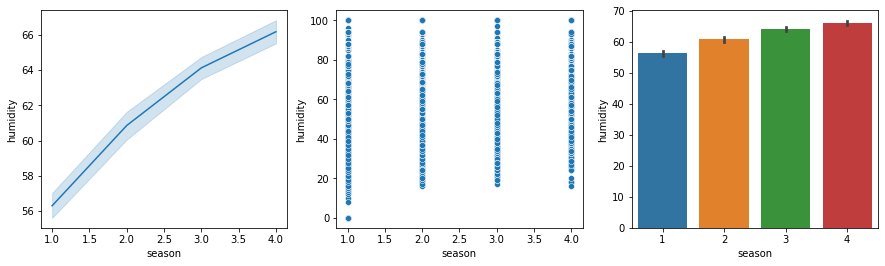

In [153]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='humidity',ax=axes[0])
sns.scatterplot(data=df,x='season',y='humidity',ax=axes[1])
sns.barplot(data=df, x="season", y="humidity", estimator=np.mean,ax=axes[2])



plt.show()

humidity order from max to min seasonwise is 4>3>2>1, so here we can see clear relation that as season increases humidity increases

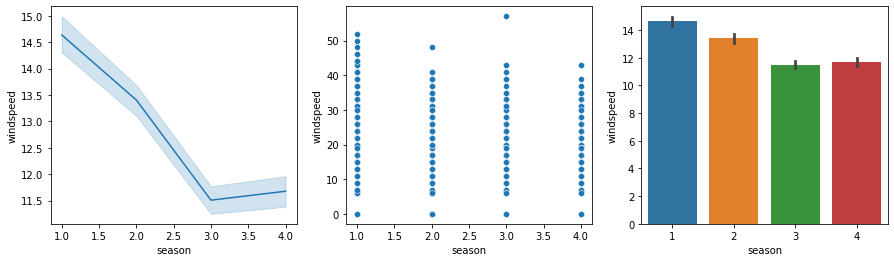

In [154]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='windspeed',ax=axes[0])
sns.scatterplot(data=df,x='season',y='windspeed',ax=axes[1])
sns.barplot(data=df, x="season", y="windspeed", estimator=np.mean,ax=axes[2])



plt.show()

windspeed order from max to min seasonwise is 1>2>4>3, so here we can see clear there is somewhat relation that as season increases windspeed decreases till season 3 then increase little bit in season 4

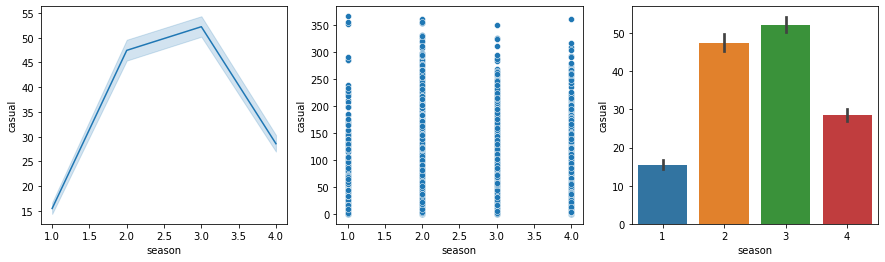

In [155]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='season',y='casual',ax=axes[1])
sns.barplot(data=df, x="season", y="casual", estimator=np.mean,ax=axes[2])


plt.show()

count of casual users order from max to min seasonwise is 3>2>4>1, so here we can see clear there is somewhat relation that as season increases count of casual users increases till season 3 then decrease in season 4

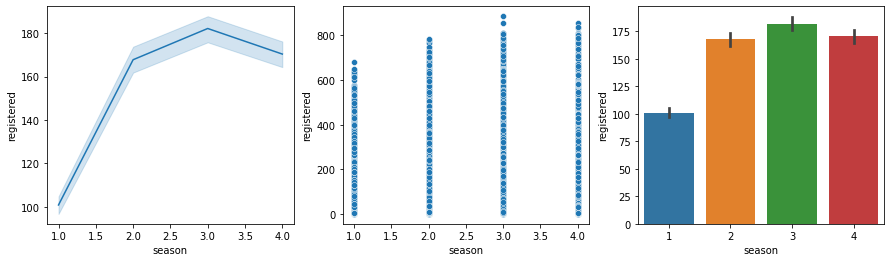

In [156]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='season',y='registered',ax=axes[1])
sns.barplot(data=df, x="season", y="registered", estimator=np.mean,ax=axes[2])


plt.show()

count of registered users order from max to min seasonwise is 3>2=4>1, so here we can see clear there is somewhat relation that as season increases count of registered users increases till season 3 then decrease and comes similar to season 2 in season 4

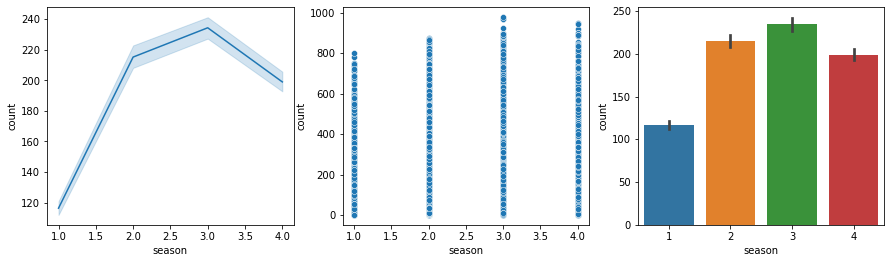

In [157]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='count',ax=axes[0])
sns.scatterplot(data=df,x='season',y='count',ax=axes[1])
sns.barplot(data=df, x="season", y="count", estimator=np.mean,ax=axes[2])


plt.show()

count of bikes rented order from max to min seasonwise is 3>2>4>1, so here we can see clear there is somewhat relation that as season increases count of bikes rented increases till season 3 then decrease in season 4

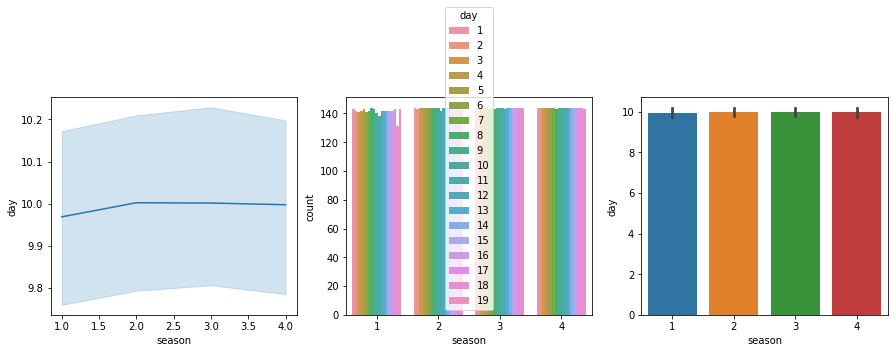

In [158]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='day',ax=axes[0])
sns.countplot(x='season',hue='day',data=df,ax=axes[1])
sns.barplot(data=df, x="season", y="day", estimator=np.mean,ax=axes[2])


plt.show()

each season has similar number of days

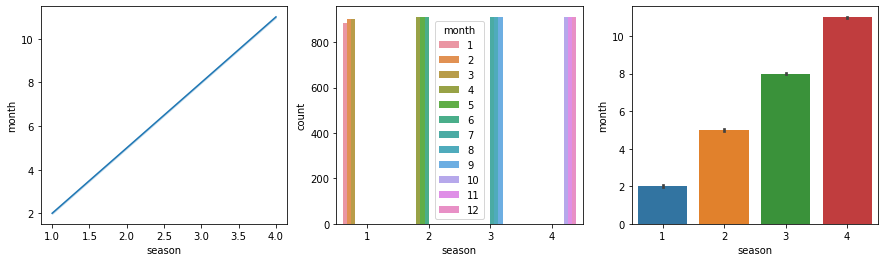

In [159]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='month',ax=axes[0])
sns.countplot(x='season',hue='month',data=df,ax=axes[1])
sns.barplot(data=df, x="season", y="month", estimator=np.mean,ax=axes[2])


plt.show()

here there is clear relation as season increases months average increases means as the season goes users rent bikes in later months ex: in season 1 bikes rented in month 1, 2, 3, 4 whereas in season 4 month are 10, 11, 12

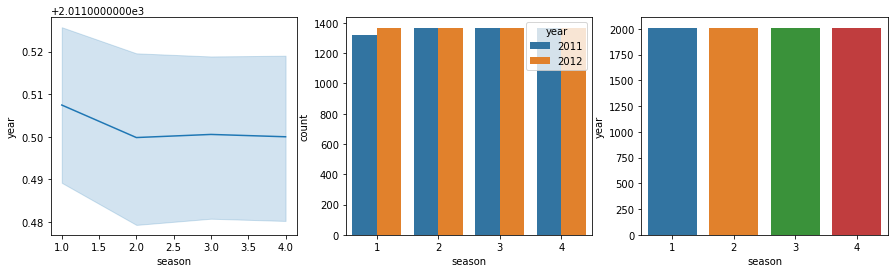

In [160]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='season',y='year',ax=axes[0])
sns.countplot(x='season',hue='year',data=df,ax=axes[1])
sns.barplot(data=df, x="season", y="year", estimator=np.mean,ax=axes[2])


plt.show()

both year contains all seasons

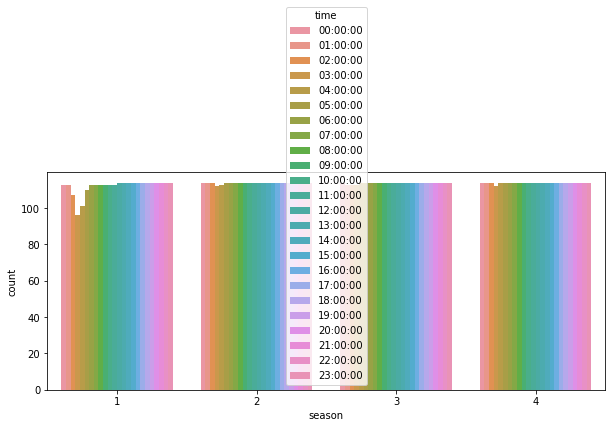

In [161]:
figure,axes = plt.subplots(1,figsize=(10,4))
sns.countplot(x='season',hue='time',data=df)


plt.show()

so, in time range of 2 a.m. to 5 a.m. there is dip in users renting bikes as compare to other time but as season increases dip reduces

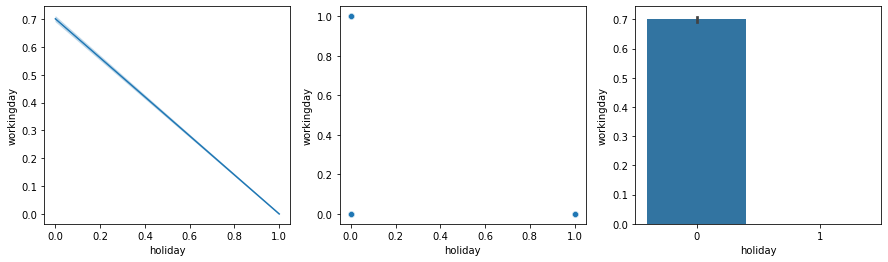

In [162]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='workingday',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='workingday',ax=axes[1])
sns.barplot(x='holiday',y='workingday',data=df,ax = axes[2])

plt.show()

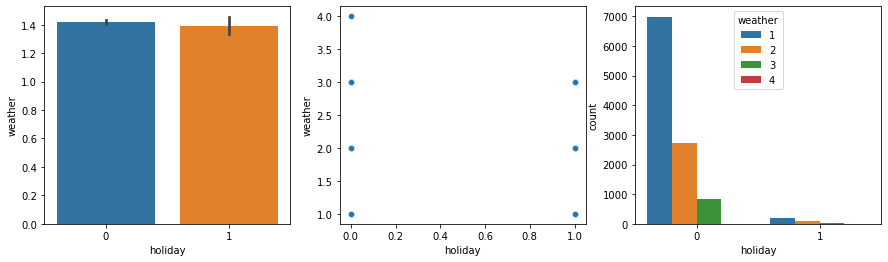

In [163]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.barplot(data=df,x='holiday',y='weather',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='weather',ax=axes[1])
sns.countplot(x='holiday',hue='weather',data=df,ax = axes[2])


plt.show()

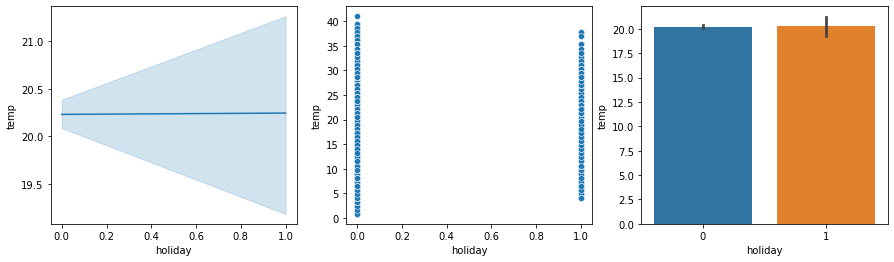

In [164]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='temp',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='temp',ax=axes[1])
sns.barplot(data=df,x='holiday',y='temp',ax=axes[2])


plt.show()

similar temperature on both holiday and non holiday

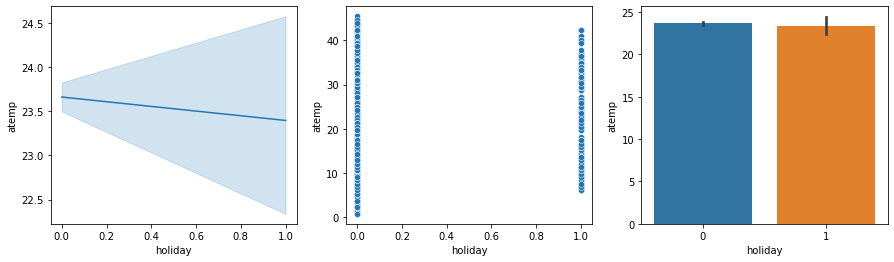

In [165]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='atemp',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='atemp',ax=axes[1])
sns.barplot(data=df,x='holiday',y='atemp',ax=axes[2])


plt.show()

similar  experienced or feeled temperature on both holiday and non holiday with just a little bit difference

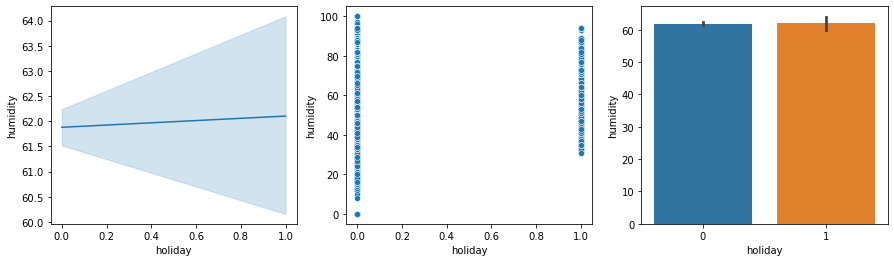

In [166]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='humidity',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='humidity',ax=axes[1])
sns.barplot(data=df,x='holiday',y='humidity',ax=axes[2])


plt.show()

similar humidity on both holiday and non holiday

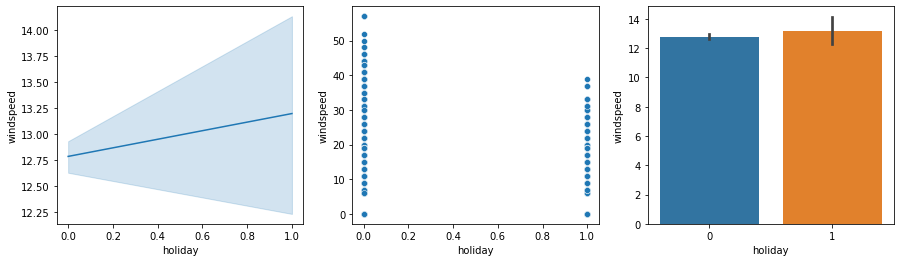

In [167]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='windspeed',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='windspeed',ax=axes[1])
sns.barplot(data=df,x='holiday',y='windspeed',ax=axes[2])


plt.show()

windspeed is little bit higher on holidays

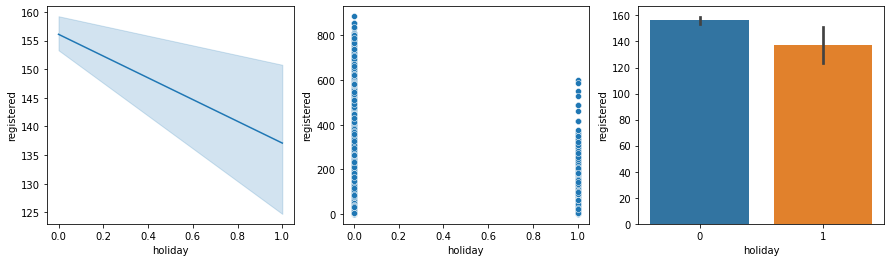

In [168]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='registered',ax=axes[1])
sns.barplot(data=df,x='holiday',y='registered',ax=axes[2])


plt.show()

on holidays registered users count goes down as compared to non holidays

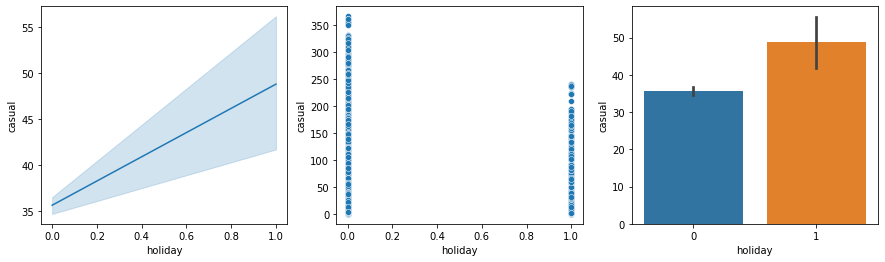

In [169]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='casual',ax=axes[1])
sns.barplot(data=df,x='holiday',y='casual',ax=axes[2])


plt.show()

whereas on holidays the number of casual users increases as compared to non holidays which is inverse of registered users

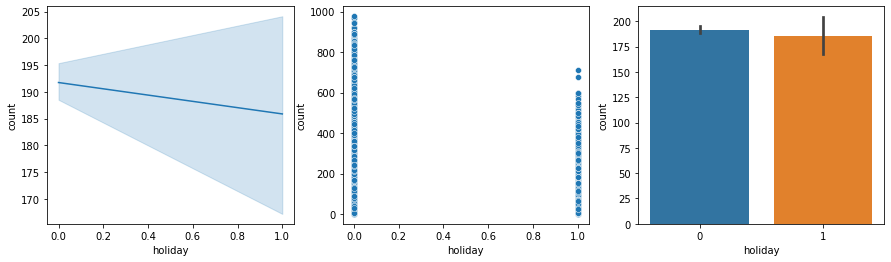

In [170]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='count',ax=axes[0])
sns.scatterplot(data=df,x='holiday',y='count',ax=axes[1])
sns.barplot(data=df,x='holiday',y='count',ax=axes[2])


plt.show()

so basically on non holidays number of rented bikes are more as compared to holidays which also shows that number of registered users are more and they contribute little more than casual users

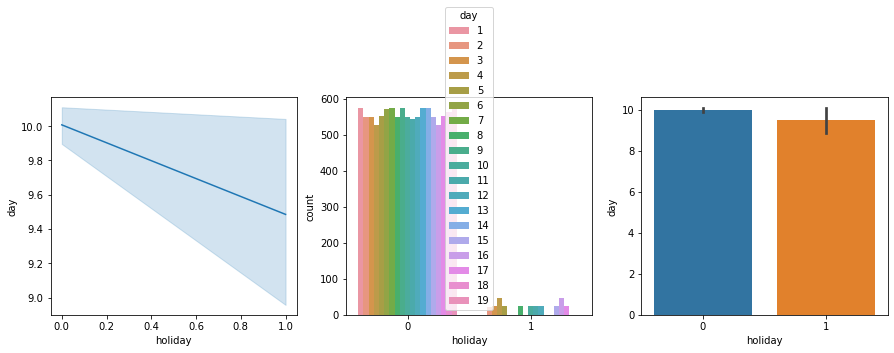

In [171]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='day',ax=axes[0])
sns.countplot(x='holiday',hue='day',data=df,ax=axes[1])
sns.barplot(data=df, x="holiday", y="day", estimator=np.mean,ax=axes[2])


plt.show()

we know holidays are on certain days so that's why there are not all days in holiday and also are very less compared to non holidays

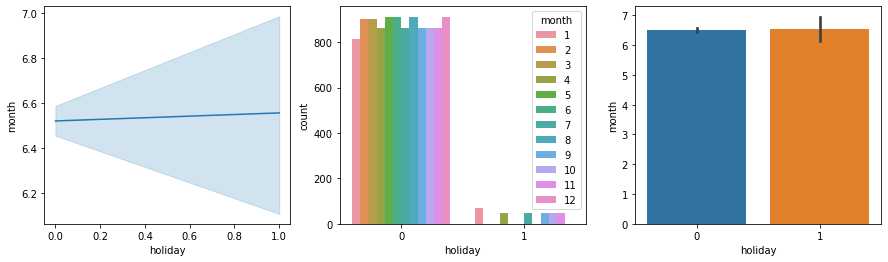

In [172]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='month',ax=axes[0])
sns.countplot(x='holiday',hue='month',data=df,ax=axes[1])
sns.barplot(data=df, x="holiday", y="month", estimator=np.mean,ax=axes[2])


plt.show()

there are quite few months with holidays

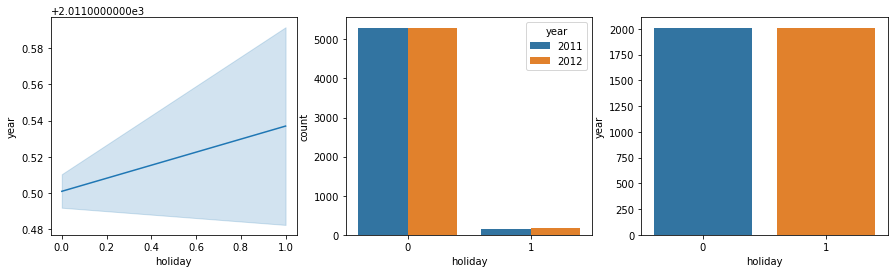

In [173]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='holiday',y='year',ax=axes[0])
sns.countplot(x='holiday',hue='year',data=df,ax=axes[1])
sns.barplot(data=df, x="holiday", y="year", estimator=np.mean,ax=axes[2])


plt.show()

there are few more holidays in year 2012 as compared to 2011

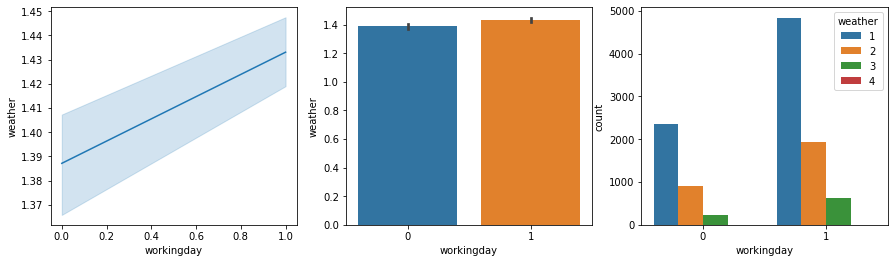

In [174]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='weather',ax=axes[0])
sns.barplot(data=df,x='workingday',y='weather',ax=axes[1])
sns.countplot(data=df,x='workingday',hue='weather',ax=axes[2])

plt.show()

as workingdays are more so we can see on workingday weather count is more but it seems that on workingday weather seems little bit high as compare to non workingday

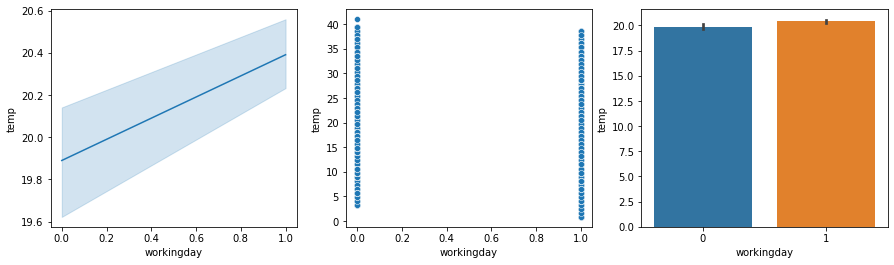

In [175]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='temp',ax=axes[0])
sns.scatterplot(data=df,x='workingday',y='temp',ax=axes[1])
sns.barplot(data=df,x='workingday',y='temp',ax=axes[2])

plt.show()

on workingdays temperature seems to little bit high as compare to non workingdays

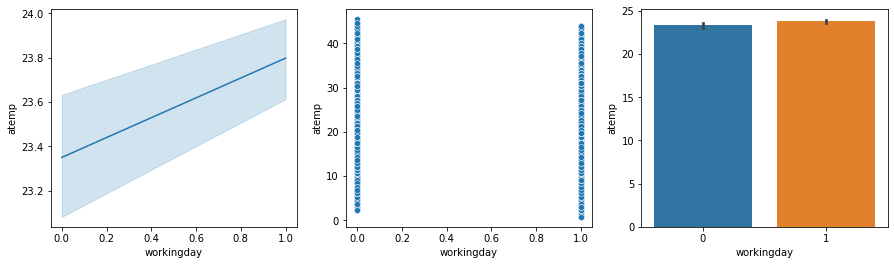

In [176]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='atemp',ax=axes[0])
sns.scatterplot(data=df,x='workingday',y='atemp',ax=axes[1])
sns.barplot(data=df,x='workingday',y='atemp',ax=axes[2])

plt.show()

on workingdays temperature experienced or feeled seems to little bit high as compare to non workingdays which is obvious as original temp is also high

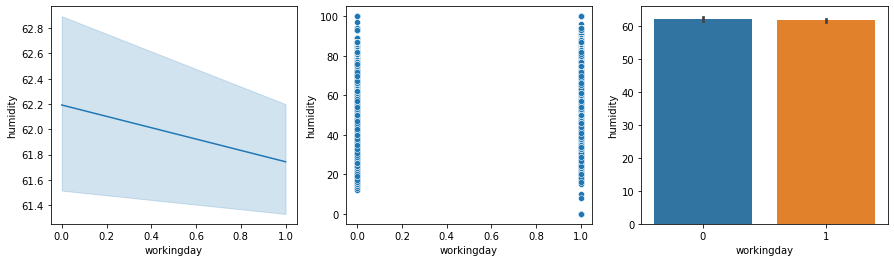

In [177]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='humidity',ax=axes[0])
sns.scatterplot(data=df,x='workingday',y='humidity',ax=axes[1])
sns.barplot(data=df,x='workingday',y='humidity',ax=axes[2])


plt.show()

humidity seems to little bit low on workingdays as compare to non workingdays

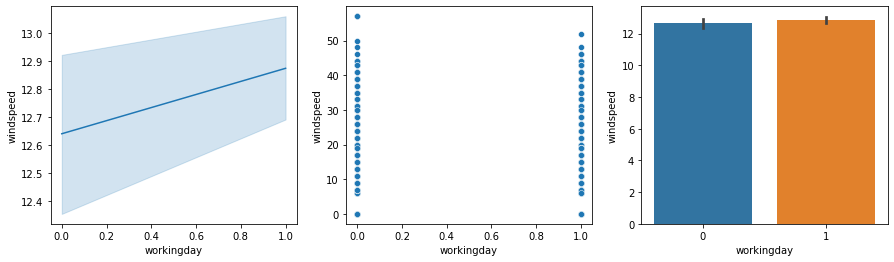

In [178]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='windspeed',ax=axes[0])
sns.scatterplot(data=df,x='workingday',y='windspeed',ax=axes[1])
sns.barplot(data=df,x='workingday',y='windspeed',ax=axes[2])


plt.show()

on workingdays windspeed seems to little bit high as compare to non workingdays

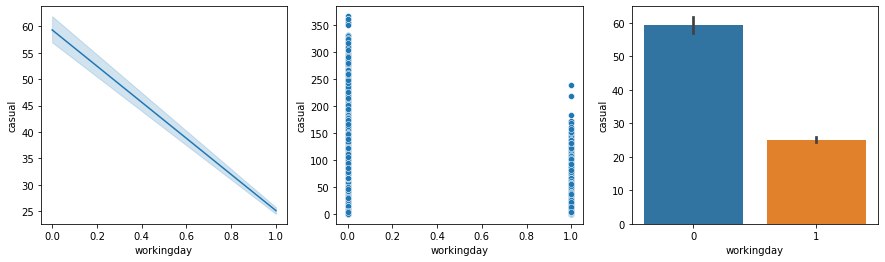

In [179]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='workingday',y='casual',ax=axes[1])
sns.barplot(data=df,x='workingday',y='casual',ax=axes[2])

plt.show()

on non workingdays count of casual users are more rather than on workindays

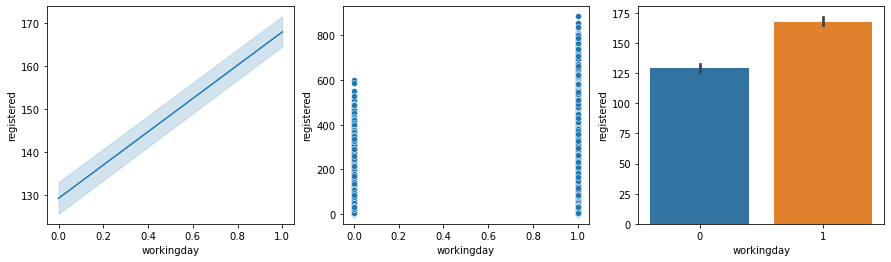

In [180]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='workingday',y='registered',ax=axes[1])
sns.barplot(data=df,x='workingday',y='registered',ax=axes[2])

plt.show()

on workingdays count of registered users are more rather than on non workingdays

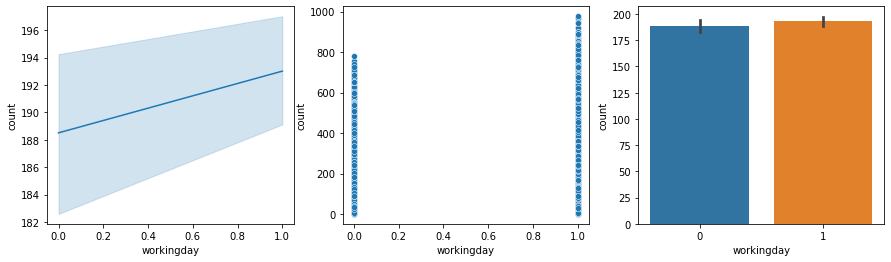

In [181]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='workingday',y='count',ax=axes[0])
sns.scatterplot(data=df,x='workingday',y='count',ax=axes[1])
sns.barplot(data=df,x='workingday',y='count',ax=axes[2])


plt.show()

on workingday count of rented bikes are little more than non workingdays means registered users are contributing little more

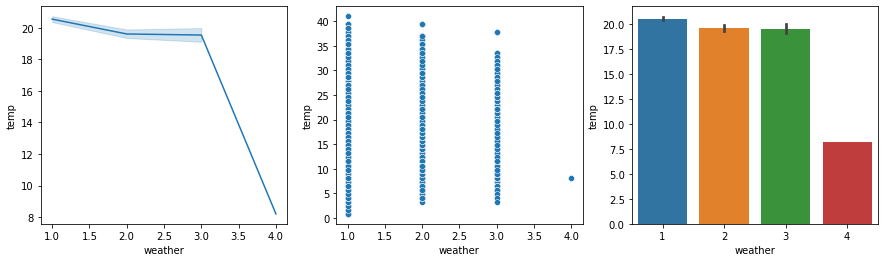

In [182]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='temp',ax=axes[0])
sns.scatterplot(data=df,x='weather',y='temp',ax=axes[1])
sns.barplot(data=df,x='weather',y='temp',ax=axes[2])



plt.show()

there seems a little bit of negative relation that as weather increases or goes forward temperature decreases or remains similar as previous weather sometimes, order of weather tempwise 1>2>=3>4

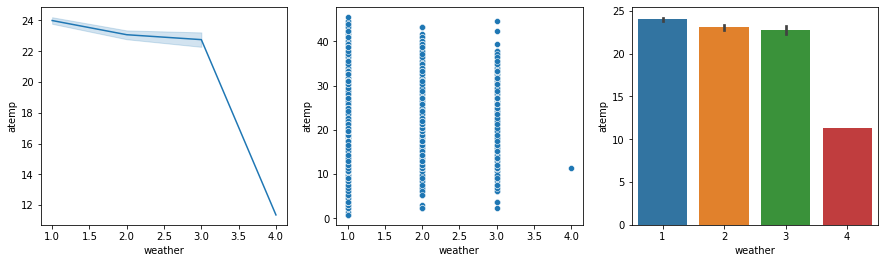

In [183]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='atemp',ax=axes[0])
sns.scatterplot(data=df,x='weather',y='atemp',ax=axes[1])
sns.barplot(data=df,x='weather',y='atemp',ax=axes[2])


plt.show()

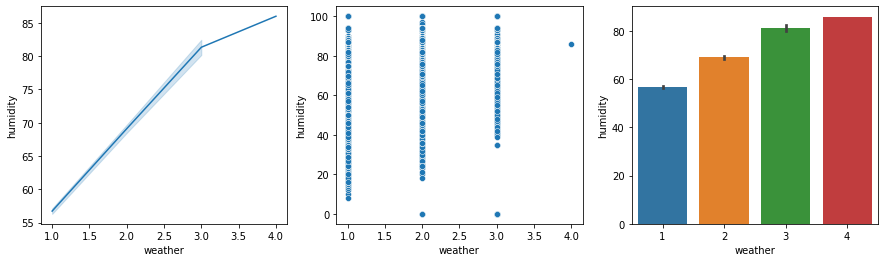

In [184]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='humidity',ax=axes[0])
sns.scatterplot(data=df,x='weather',y='humidity',ax=axes[1])
sns.barplot(data=df,x='weather',y='humidity',ax=axes[2])


plt.show()

so as weather increases or goes forward humidity also increases, order of weather humidity wise 1<2<3<4

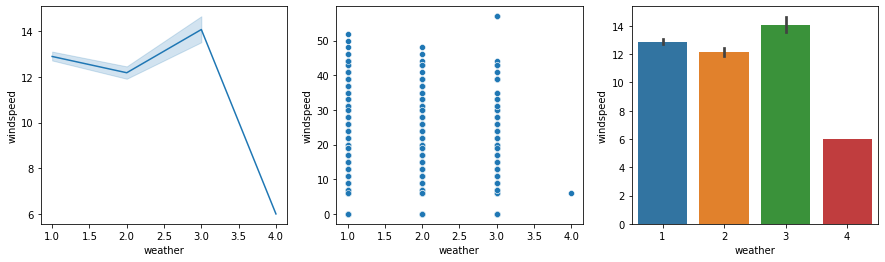

In [185]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='windspeed',ax=axes[0])
sns.scatterplot(data=df,x='weather',y='windspeed',ax=axes[1])
sns.barplot(data=df,x='weather',y='windspeed',ax=axes[2])

plt.show()

so there is no quite straight relation but order for weather windspeed wise is 3>1>2>4

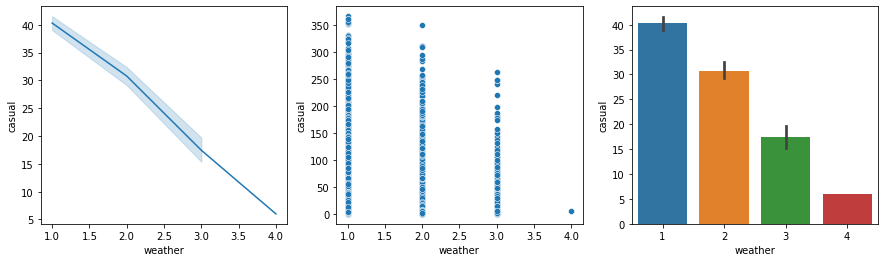

In [186]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='weather',y='casual',ax=axes[1])
sns.barplot(data=df,x='weather',y='casual',ax=axes[2])

plt.show()

quite a relation between weather and count of casual users as weather increases count of casual users decreases, order 1>2>3>4

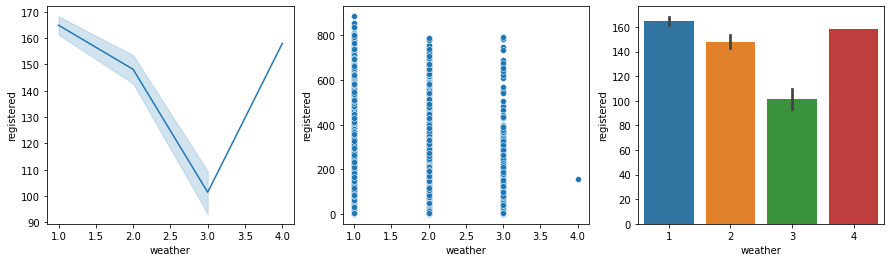

In [187]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='weather',y='registered',ax=axes[1])
sns.barplot(data=df,x='weather',y='registered',ax=axes[2])

plt.show()

so there is a relation till weather 3 as weather goes forward count of registered users decreases but from afterwards weather there is a quite a increase in registered users, order is 1>4>2>3

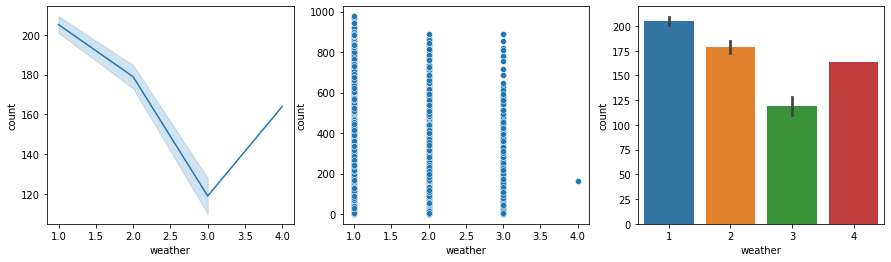

In [188]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='count',ax=axes[0])
sns.scatterplot(data=df,x='weather',y='count',ax=axes[1])
sns.barplot(data=df,x='weather',y='count',ax=axes[2])


plt.show()

as we have concluded that registered users contribute little more towards count of rented bikes therfore relation of count with weather is similar as registered with weather

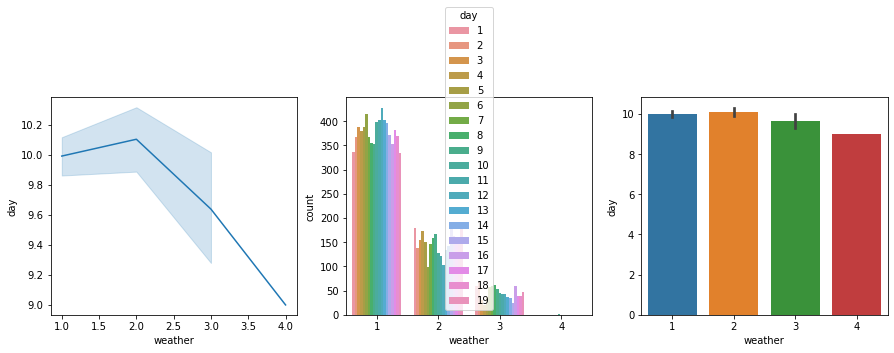

In [189]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='day',ax=axes[0])
sns.countplot(data=df,x='weather',hue='day',ax=axes[1])
sns.barplot(data=df,x='weather',y='day',ax=axes[2])


plt.show()

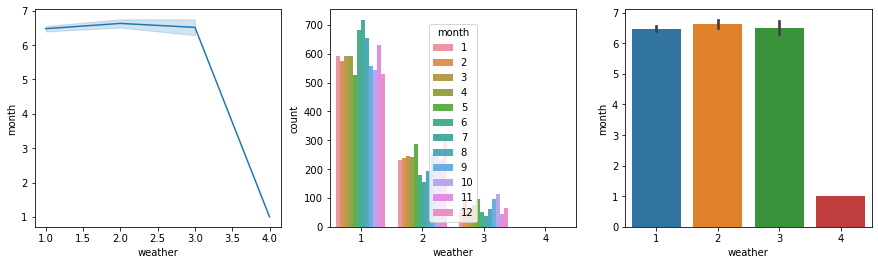

In [190]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='month',ax=axes[0])
sns.countplot(data=df,x='weather',hue='month',ax=axes[1])
sns.barplot(data=df,x='weather',y='month',ax=axes[2])


plt.show()

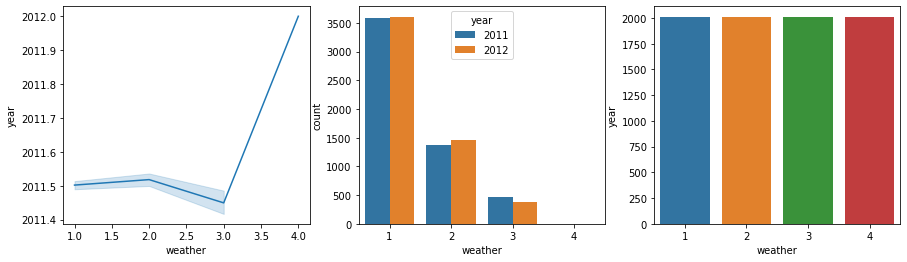

In [191]:
figure,axes = plt.subplots(1,3,figsize=(15,4))
sns.lineplot(data=df,x='weather',y='year',ax=axes[0])
sns.countplot(data=df,x='weather',hue='year',ax=axes[1])
sns.barplot(data=df,x='weather',y='year',ax=axes[2])


plt.show()

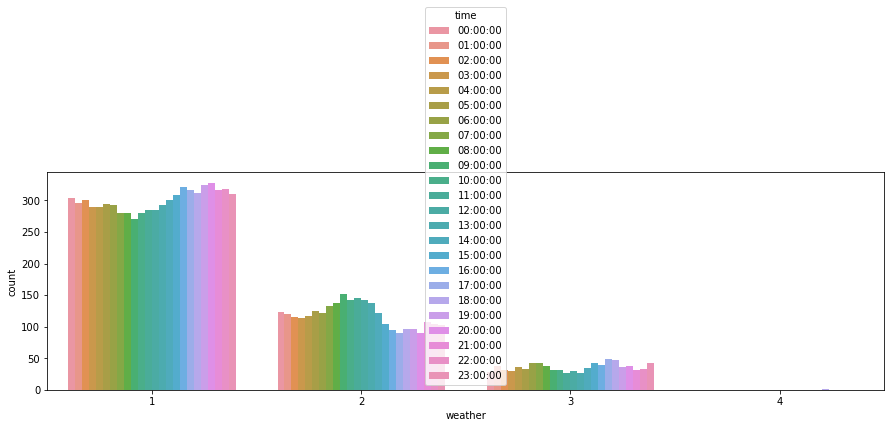

In [192]:
figure,axes = plt.subplots(1,figsize=(15,4))
sns.countplot(data=df,x='weather',hue='time')


plt.show()

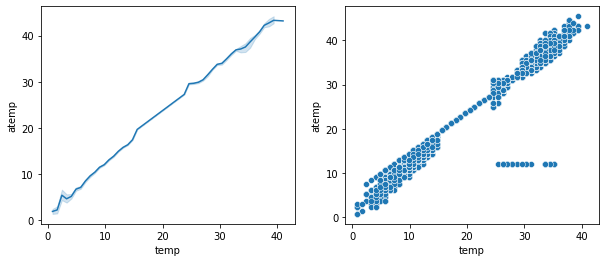

In [193]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='temp',y='atemp',ax=axes[0])
sns.scatterplot(data=df,x='temp',y='atemp',ax=axes[1])

plt.show()

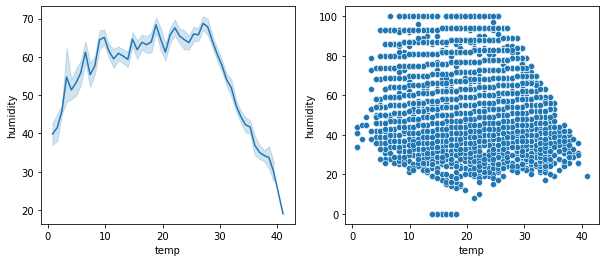

In [194]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='temp',y='humidity',ax=axes[0])
sns.scatterplot(data=df,x='temp',y='humidity',ax=axes[1])

plt.show()

till temp 30 as temp increases humidity increases but for temp>30 as temp increases humidity decreases

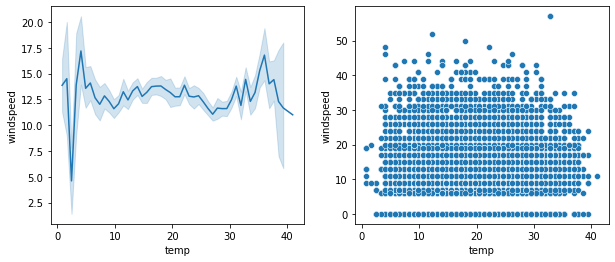

In [195]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='temp',y='windspeed',ax=axes[0])
sns.scatterplot(data=df,x='temp',y='windspeed',ax=axes[1])

plt.show()

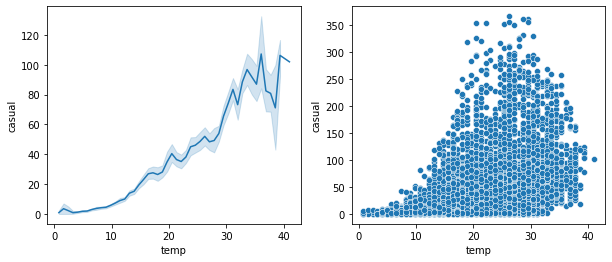

In [196]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='temp',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='temp',y='casual',ax=axes[1])

plt.show()

as temp increases number of casual users increases

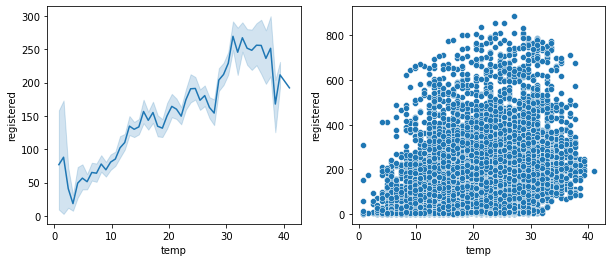

In [197]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='temp',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='temp',y='registered',ax=axes[1])

plt.show()

as temp increases number of registered users increases

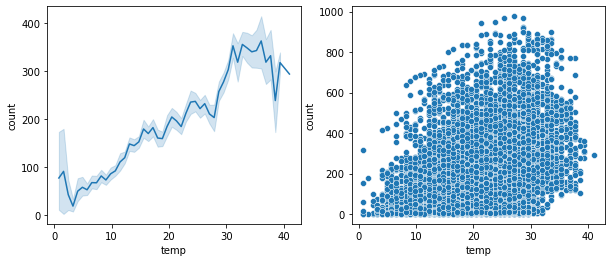

In [198]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='temp',y='count',ax=axes[0])
sns.scatterplot(data=df,x='temp',y='count',ax=axes[1])

plt.show()

as temp increases number of rented bikes increases

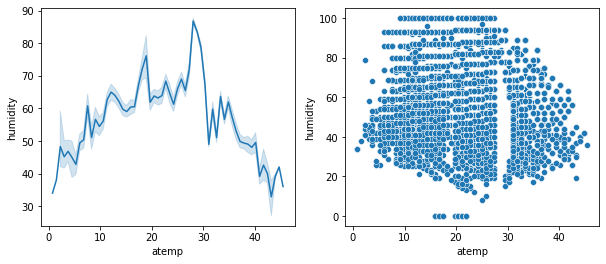

In [199]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='atemp',y='humidity',ax=axes[0])
sns.scatterplot(data=df,x='atemp',y='humidity',ax=axes[1])

plt.show()

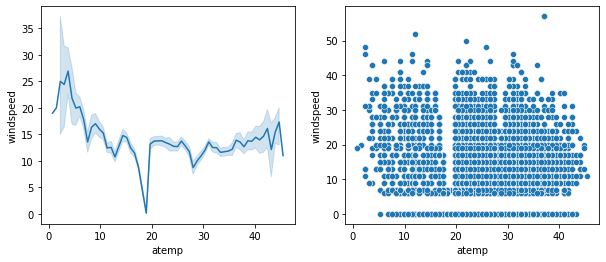

In [200]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='atemp',y='windspeed',ax=axes[0])
sns.scatterplot(data=df,x='atemp',y='windspeed',ax=axes[1])

plt.show()

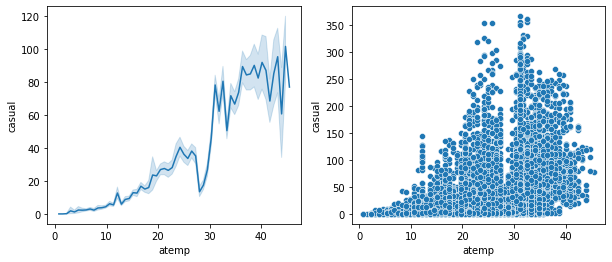

In [201]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='atemp',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='atemp',y='casual',ax=axes[1])

plt.show()

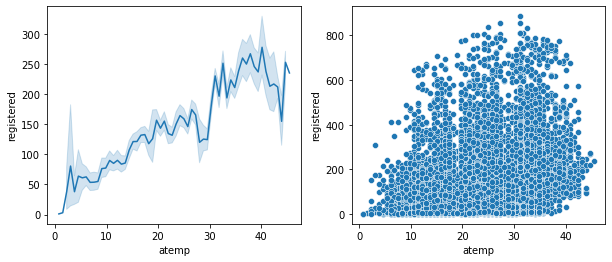

In [202]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='atemp',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='atemp',y='registered',ax=axes[1])

plt.show()

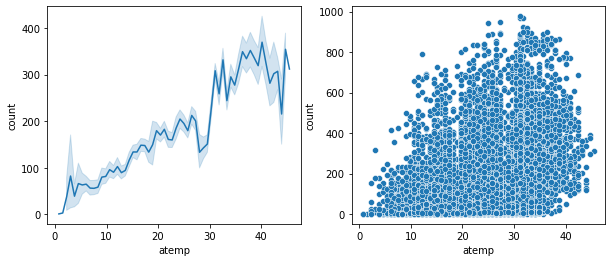

In [203]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='atemp',y='count',ax=axes[0])
sns.scatterplot(data=df,x='atemp',y='count',ax=axes[1])

plt.show()

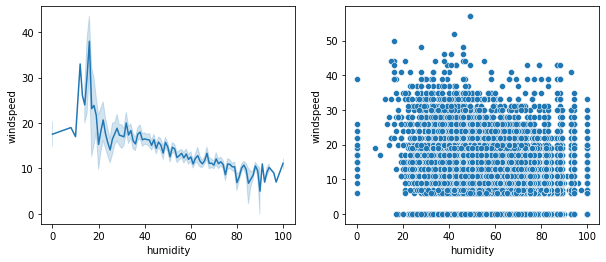

In [204]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='humidity',y='windspeed',ax=axes[0])
sns.scatterplot(data=df,x='humidity',y='windspeed',ax=axes[1])

plt.show()

generally humidity increases windspeed decreases

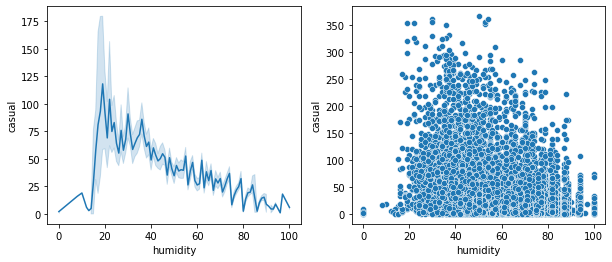

In [205]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='humidity',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='humidity',y='casual',ax=axes[1])

plt.show()

gnerally humidity increases after a certain amount(approx 20) number of casual users decreases

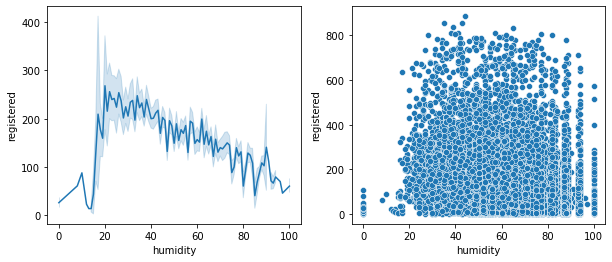

In [206]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='humidity',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='humidity',y='registered',ax=axes[1])

plt.show()

gnerally humidity increases after a certain amount(approx 20) number of registered users decreases

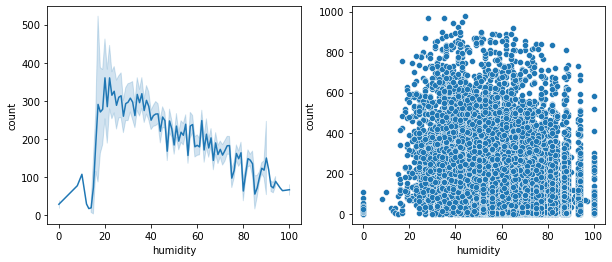

In [207]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='humidity',y='count',ax=axes[0])
sns.scatterplot(data=df,x='humidity',y='count',ax=axes[1])

plt.show()

gnerally humidity increases after a certain amount(approx 20) number of rented bikes decreases

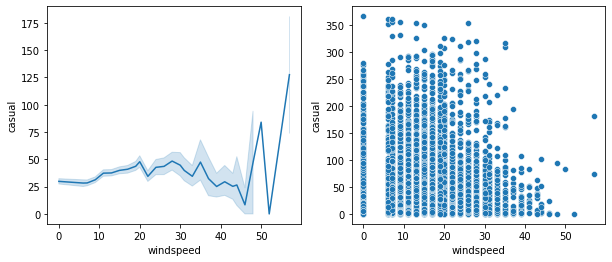

In [208]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='windspeed',y='casual',ax=axes[0])
sns.scatterplot(data=df,x='windspeed',y='casual',ax=axes[1])

plt.show()

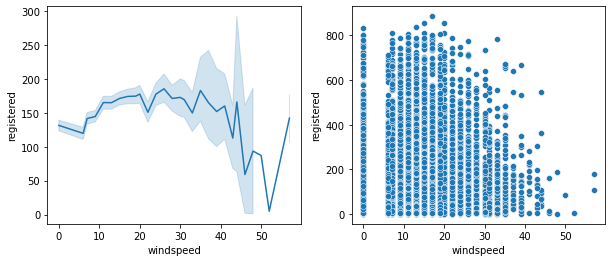

In [209]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='windspeed',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='windspeed',y='registered',ax=axes[1])

plt.show()

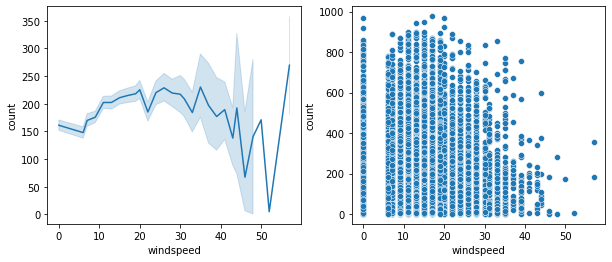

In [210]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='windspeed',y='count',ax=axes[0])
sns.scatterplot(data=df,x='windspeed',y='count',ax=axes[1])

plt.show()

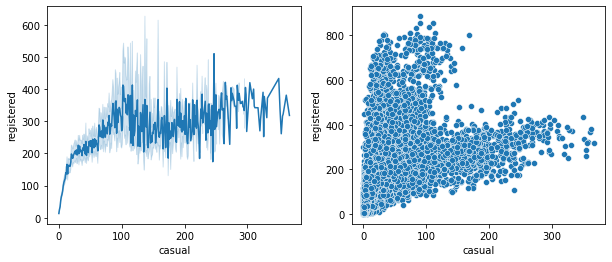

In [211]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='casual',y='registered',ax=axes[0])
sns.scatterplot(data=df,x='casual',y='registered',ax=axes[1])

plt.show()

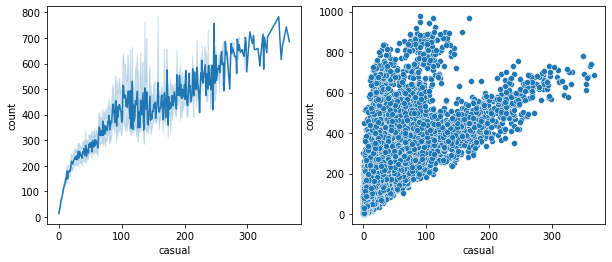

In [212]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='casual',y='count',ax=axes[0])
sns.scatterplot(data=df,x='casual',y='count',ax=axes[1])

plt.show()

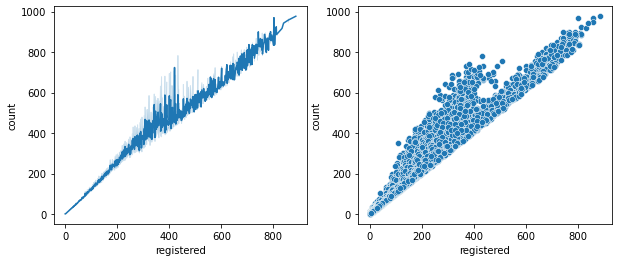

In [213]:
figure,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df,x='registered',y='count',ax=axes[0])
sns.scatterplot(data=df,x='registered',y='count',ax=axes[1])

plt.show()

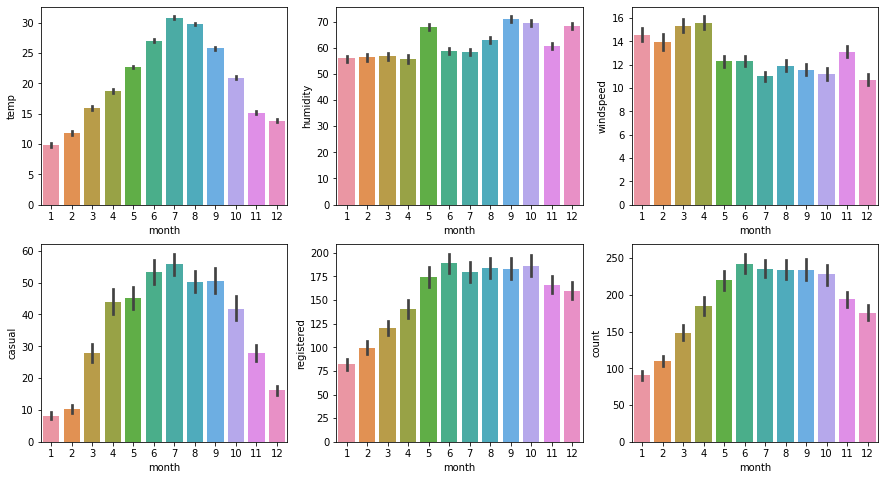

In [214]:
figure,axes = plt.subplots(2,3,figsize=(15,8))
sns.barplot(data=df,x='month',y='temp',ax=axes[0][0])
sns.barplot(data=df,x='month',y='humidity',ax=axes[0][1])
sns.barplot(data=df,x='month',y='windspeed',ax=axes[0][2])
sns.barplot(data=df,x='month',y='casual',ax=axes[1][0])
sns.barplot(data=df,x='month',y='registered',ax=axes[1][1])
sns.barplot(data=df,x='month',y='count',ax=axes[1][2])

plt.show()

1. till month 7 temp increases as month goes forward afterwards temp starts decreasing(max it at month 7)
2. similar kind for count of casual users as temp vs month(max it at month 7)
3. till month 6 count of registered user increases as month goes forward afterwards it kind of gets constant with a little dip as compared to month 6 till month 10 and then decreases(max it at month 6)
4. till month 6 count of rented bikes increases as month goes forward afterwards count of rented bikes starts decreasing(max it at month 6)

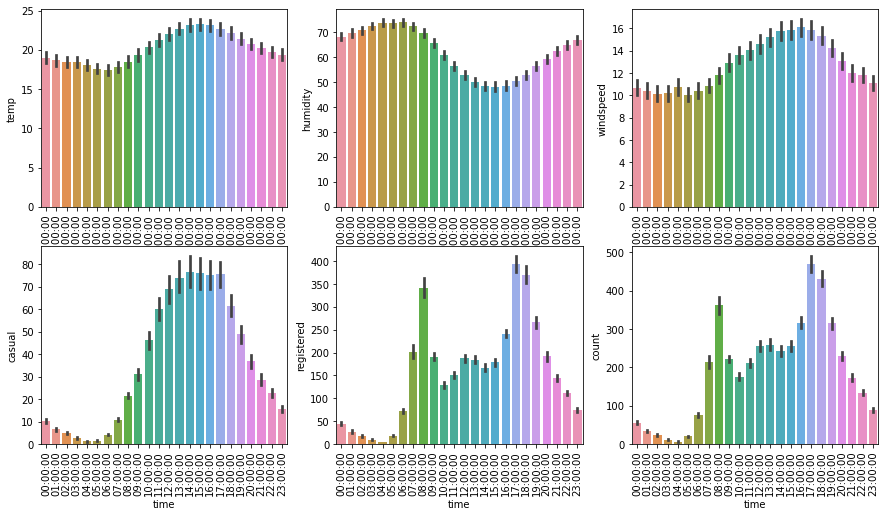

In [215]:
figure,axes = plt.subplots(2,3,figsize=(15,8))
sns.barplot(data=df,x='time',y='temp',ax=axes[0][0])
axes[0][0].set_xticklabels(labels=df['time'].unique(),rotation=90)
sns.barplot(data=df,x='time',y='humidity',ax=axes[0][1])
axes[0][1].set_xticklabels(labels=df['time'].unique(),rotation=90)
sns.barplot(data=df,x='time',y='windspeed',ax=axes[0][2])
axes[0][2].set_xticklabels(labels=df['time'].unique(),rotation=90)
sns.barplot(data=df,x='time',y='casual',ax=axes[1][0])
axes[1][0].set_xticklabels(labels=df['time'].unique(),rotation=90)
sns.barplot(data=df,x='time',y='registered',ax=axes[1][1])
axes[1][1].set_xticklabels(labels=df['time'].unique(),rotation=90)
sns.barplot(data=df,x='time',y='count',ax=axes[1][2])
axes[1][2].set_xticklabels(labels=df['time'].unique(),rotation=90)

plt.show()

overall what we get that from 00:00 a.m. to 5:00 a.m. count of users as well as rented bikes are minimum

In [216]:
df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.001729,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.015877,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.009829,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.007890,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.015551,0.257589,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.011866,0.264173,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.011335,0.204537,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.036157,-0.150192,-0.015221
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.014109,0.092722,0.145241
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.019111,0.169451,0.264265


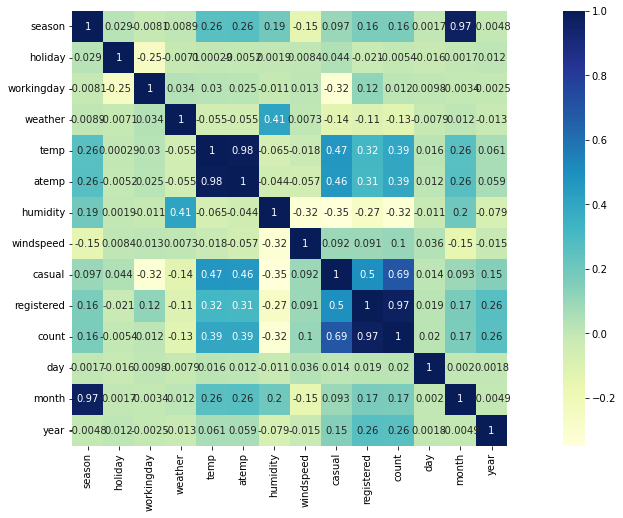

In [217]:
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr(),annot=True,square=True,cmap='YlGnBu')
plt.show()

# Test are for making inferences for Population

## appropriate test to check Working Day has effect on number of electric cycles rented

In [218]:
#H0 : Workingday has no effect on number of electric cycles rented
#Ha : Working Day has effect on number of electric cycles rented

#significance level(alpha) = 0.05
from scipy.stats import ttest_ind

s1 = df[df['workingday']==0]['count']
s2 = df[df['workingday']==1]['count']

test_stat,p_value = ttest_ind(s2,s1)
print("Test Statistic is {}".format(test_stat),end=", ")
print("Pvalue is {}".format(p_value))
if(p_value<0.05):
    print("Reject H0")
    print("Working Day has effect on number of electric cycles rented")
else:
    print("Fail to reject H0")
    print("Working Day has no effect on number of electric cycles rented")

Test Statistic is 1.2096277376026694, Pvalue is 0.22644804226361348
Fail to reject H0
Working Day has no effect on number of electric cycles rented


## appropriate test to check No. of cycles rented similar or different in different seasons

<AxesSubplot:xlabel='count', ylabel='Count'>

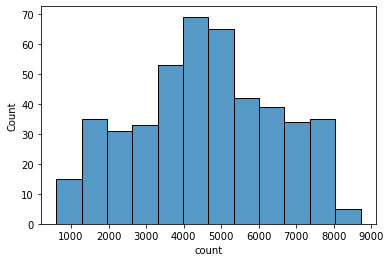

In [219]:
df_g = df.groupby(['date']).agg({'count':'sum'}).reset_index()
sns.histplot(data=df_g, x="count")

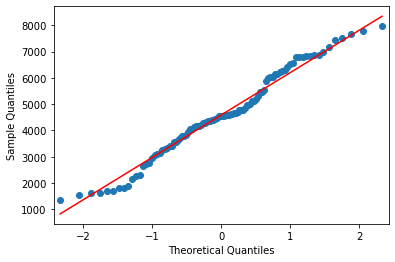

In [220]:
from scipy.stats import shapiro,levene
from statsmodels.graphics.gofplots import qqplot

s = df_g['count'].sample(100)
qqplot(s,line='s')
plt.show()


therefore count column does not follow gaussian as it fails qqplot test thereby annova can't also be suitable for this test therfore we use kruskal test

In [221]:
s1 = df[df['season']==1]['count']
s2 = df[df['season']==2]['count']
s3 = df[df['season']==3]['count']
s4 = df[df['season']==4]['count']

test_statistic_s , p_value_s = shapiro(s)
if(p_value_s<0.05):
    print("count variable is not gaussian")
else:
    print("count variable is gaussian")
    
test_statistic_l , p_value_l = levene(s1.sample(100),s2.sample(100),s3.sample(100),s4.sample(100))
if(p_value_l<0.05):
    print("count variable has no similar variance across different seasons")
else:
    print("count variable has similar variance across different seasons")

count variable is gaussian
count variable has no similar variance across different seasons


In [222]:
#H0 : No. of cycles rented similar in different seasons
#Ha : No. of cycles rented different in different seasons

#significance level(alpha) = 0.05
from scipy.stats import kruskal

test_stat, p_value = kruskal(s1,s2,s3,s4)
print("Test Statistic is {}".format(test_stat),end=", ")
print("Pvalue is {}".format(p_value))

if(p_value<0.05):
    print("Reject H0")
    print("No. of cycles rented different in different seasons")
else:
    print("Fail to reject H0")
    print("No. of cycles rented similar in different seasons")

Test Statistic is 699.6668548181988, Pvalue is 2.479008372608633e-151
Reject H0
No. of cycles rented different in different seasons


## appropriate test to check No. of cycles rented similar or different in different weather

In [223]:
#H0 : No. of cycles rented similar in different weather
#Ha : No. of cycles rented different in different weather

#significance level(alpha) = 0.05

s1 = df[df['weather']==1]['count']
s2 = df[df['weather']==2]['count']
s3 = df[df['weather']==3]['count']
s4 = df[df['weather']==4]['count']
from scipy.stats import kruskal

test_stat, p_value = kruskal(s1,s2,s3,s4)
print("Test Statistic is {}".format(test_stat),end=", ")
print("Pvalue is {}".format(p_value))

if(p_value<0.05):
    print("Reject H0")
    print("No. of cycles rented different in different weather")
else:
    print("Fail to reject H0")
    print("No. of cycles rented similar in different weather")

Test Statistic is 205.00216514479087, Pvalue is 3.501611300708679e-44
Reject H0
No. of cycles rented different in different weather


## appropriate test to check Weather is dependent on season

In [224]:
df.groupby(['season','weather'])['weather'].count()

season  weather
1       1          1759
        2           715
        3           211
        4             1
2       1          1801
        2           708
        3           224
3       1          1930
        2           604
        3           199
4       1          1702
        2           807
        3           225
Name: weather, dtype: int64

In [225]:
weather_season = pd.crosstab(index=df['season'],columns=df['weather'])
weather_season
    

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


as for weather 4 values are smaller than 5 which is against the assumption of chi2_contingency test therefore we merge it with weather 3

In [226]:
df_weather = df['weather'].replace(4,3)
df_weather.unique()

array([1, 2, 3], dtype=int64)

In [227]:
weather_season_up = pd.crosstab(index=df['season'],columns=df_weather)
weather_season_up

weather,1,2,3
season,,,
1,1759,715,212
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [228]:
#H0 : Weather is independent of season
#Ha : Weather is dependent on season

#significance level(alpha) = 0.05
from scipy.stats import chi2_contingency

chi_stat, p_value, dof, expected = chi2_contingency(weather_season_up)
print("Expected values to be: {}".format(expected))
print("Test Statistic is {}".format(chi_stat))
print("Pvalue is {}".format(p_value))
print("Degree of Freedom is {}".format(dof))
if p_value < 0.05:
    print("Reject H0")
    print("Weather is dependent on season")
else:
    print("Fail to reject H0")
    print("Weather is independent of season")


Expected values to be: [[1774.54638986  699.25812971  212.19548043]
 [1805.59764836  711.49384531  215.90850634]
 [1805.59764836  711.49384531  215.90850634]
 [1806.25831343  711.75417968  215.98750689]]
Test Statistic is 46.098057769660684
Pvalue is 2.8304096630424703e-08
Degree of Freedom is 6
Reject H0
Weather is dependent on season


# Recommendations

(for population)
1. As we get to know that number of cycles rented depend on weather and season, so based on the activity as per them throw offers, relaxation in cost, provide additional features or services etc to get more users or make the existing users also excited whocan also refer to their relatives due to which networking of product increases

others if applicable
1. As temperature increases number of users increase which also contribute to increase in count of rented bikes so as per  temperature in days/hours/months push notifications for lucrative offers to users or provide any service that can reduce the effects of that temperature due to which users are not engaging so that the engagement increases

2. As humidity increases number of users decrease which also contribute to decrease in count of rented bikes so as per humidity in days/hours/months push notifications for lucrative offers to users or provide any service that can reduce the effects of that humidity due to which users are not engaging so that the engagement increases

3. As per months push notifications for lucrative offers to users or provide any service that can reduce the effects of that months due to which users are not engaging so that the engagement increases as seen in early and last months of year activity of users decreases

4. As per time push notifications for lucrative offers to users or provide any service or could host an competition that can reduce the effects of that time due to which users are not engaging so that the engagement increases as seen from time 00:00 am to 5:00 am activity of users is the least